In [ ]:
!nvidia-smi

Sun Oct 15 02:20:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# MOUNT THE DRIVE



In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## Path for the datasets


In [ ]:
#import os
#HOME = os.getcwd()
HOME = "/content/drive/MyDrive/datasets/fire"
print(HOME)

/content/drive/MyDrive/datasets/fire


## Installing the Ultralytics package for model to be used

YOLOv8 can be installed using two different ways:
1. From the source
2. Using the pip


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

CLI
If your goal is to train, validate, or run inference on YOLO models without needing to make any code modifications, you can leverage the YOLO command-line interface (CLI) provided by the Ultralytics YOLO framework. The CLI simplifies the process of using YOLO models for various tasks. Here's a brief overview of how to use the CLI for different tasks:
1. Detection Task:
To perform object detection tasks using YOLO, you can use the following CLI command:
  yolo task=detect mode=train model=yolov8n.yaml args...

2. Classification Task:
If your goal is to classify objects using YOLO models, you can use the CLI like this:

  yolo task=classify model=yolov8n-cls.yaml args...

3. Segmentation Task:
For image segmentation tasks, you can use the CLI as follows:

  yolo task=segment val model=yolov8n-seg.yaml args...

4. Export Model:
To export a trained YOLO model, you can use the CLI with export options, such as converting it to ONNX format:
    
    yolo export model=yolov8n.pt format=onnx args...

  
Each of these commands has specific arguments and options that you can customize according to your needs. The documentation for the Ultralytics YOLO framework will provide detailed information on the available arguments and options for each task. You can refer to the official Ultralytics YOLO documentation to learn more about using the CLI for your specific use case.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content/drive/MyDrive/datasets/fire
2023-10-17 07:49:00.944651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 07:49:02.366481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/drive/MyDrive/datasets/fire/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 62.9ms
Speed: 0.6ms pre-process, 62.9ms inference, 338.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict14


The command yolo mode=predict performs YOLOv8 inference on various input sources. It automatically downloads the latest YOLOv8 models and saves the results in the "runs/predict" directory.

We can see the below example to detect a dog.

/content/drive/MyDrive/datasets/fire


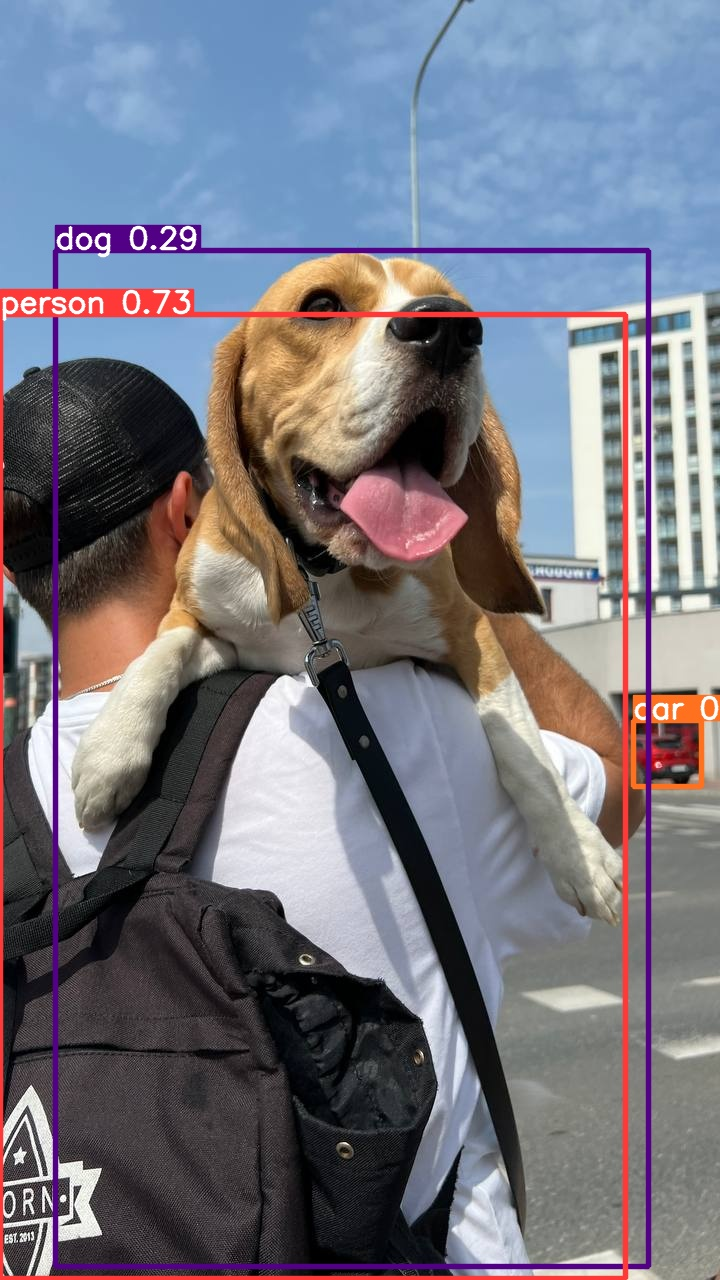

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format.
Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


### Running the model on the dataset for 25 epochs
NOTE: Please make sure to check the path at once the cell runs successfully

Example: "Results saved to runs/detect/train4"

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=1024 plots=True

/content/drive/MyDrive/datasets/fire
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=1024, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


## CONFUSION MATRIX OF THE MODEL PERFORMANCE

/content/drive/MyDrive/datasets/fire


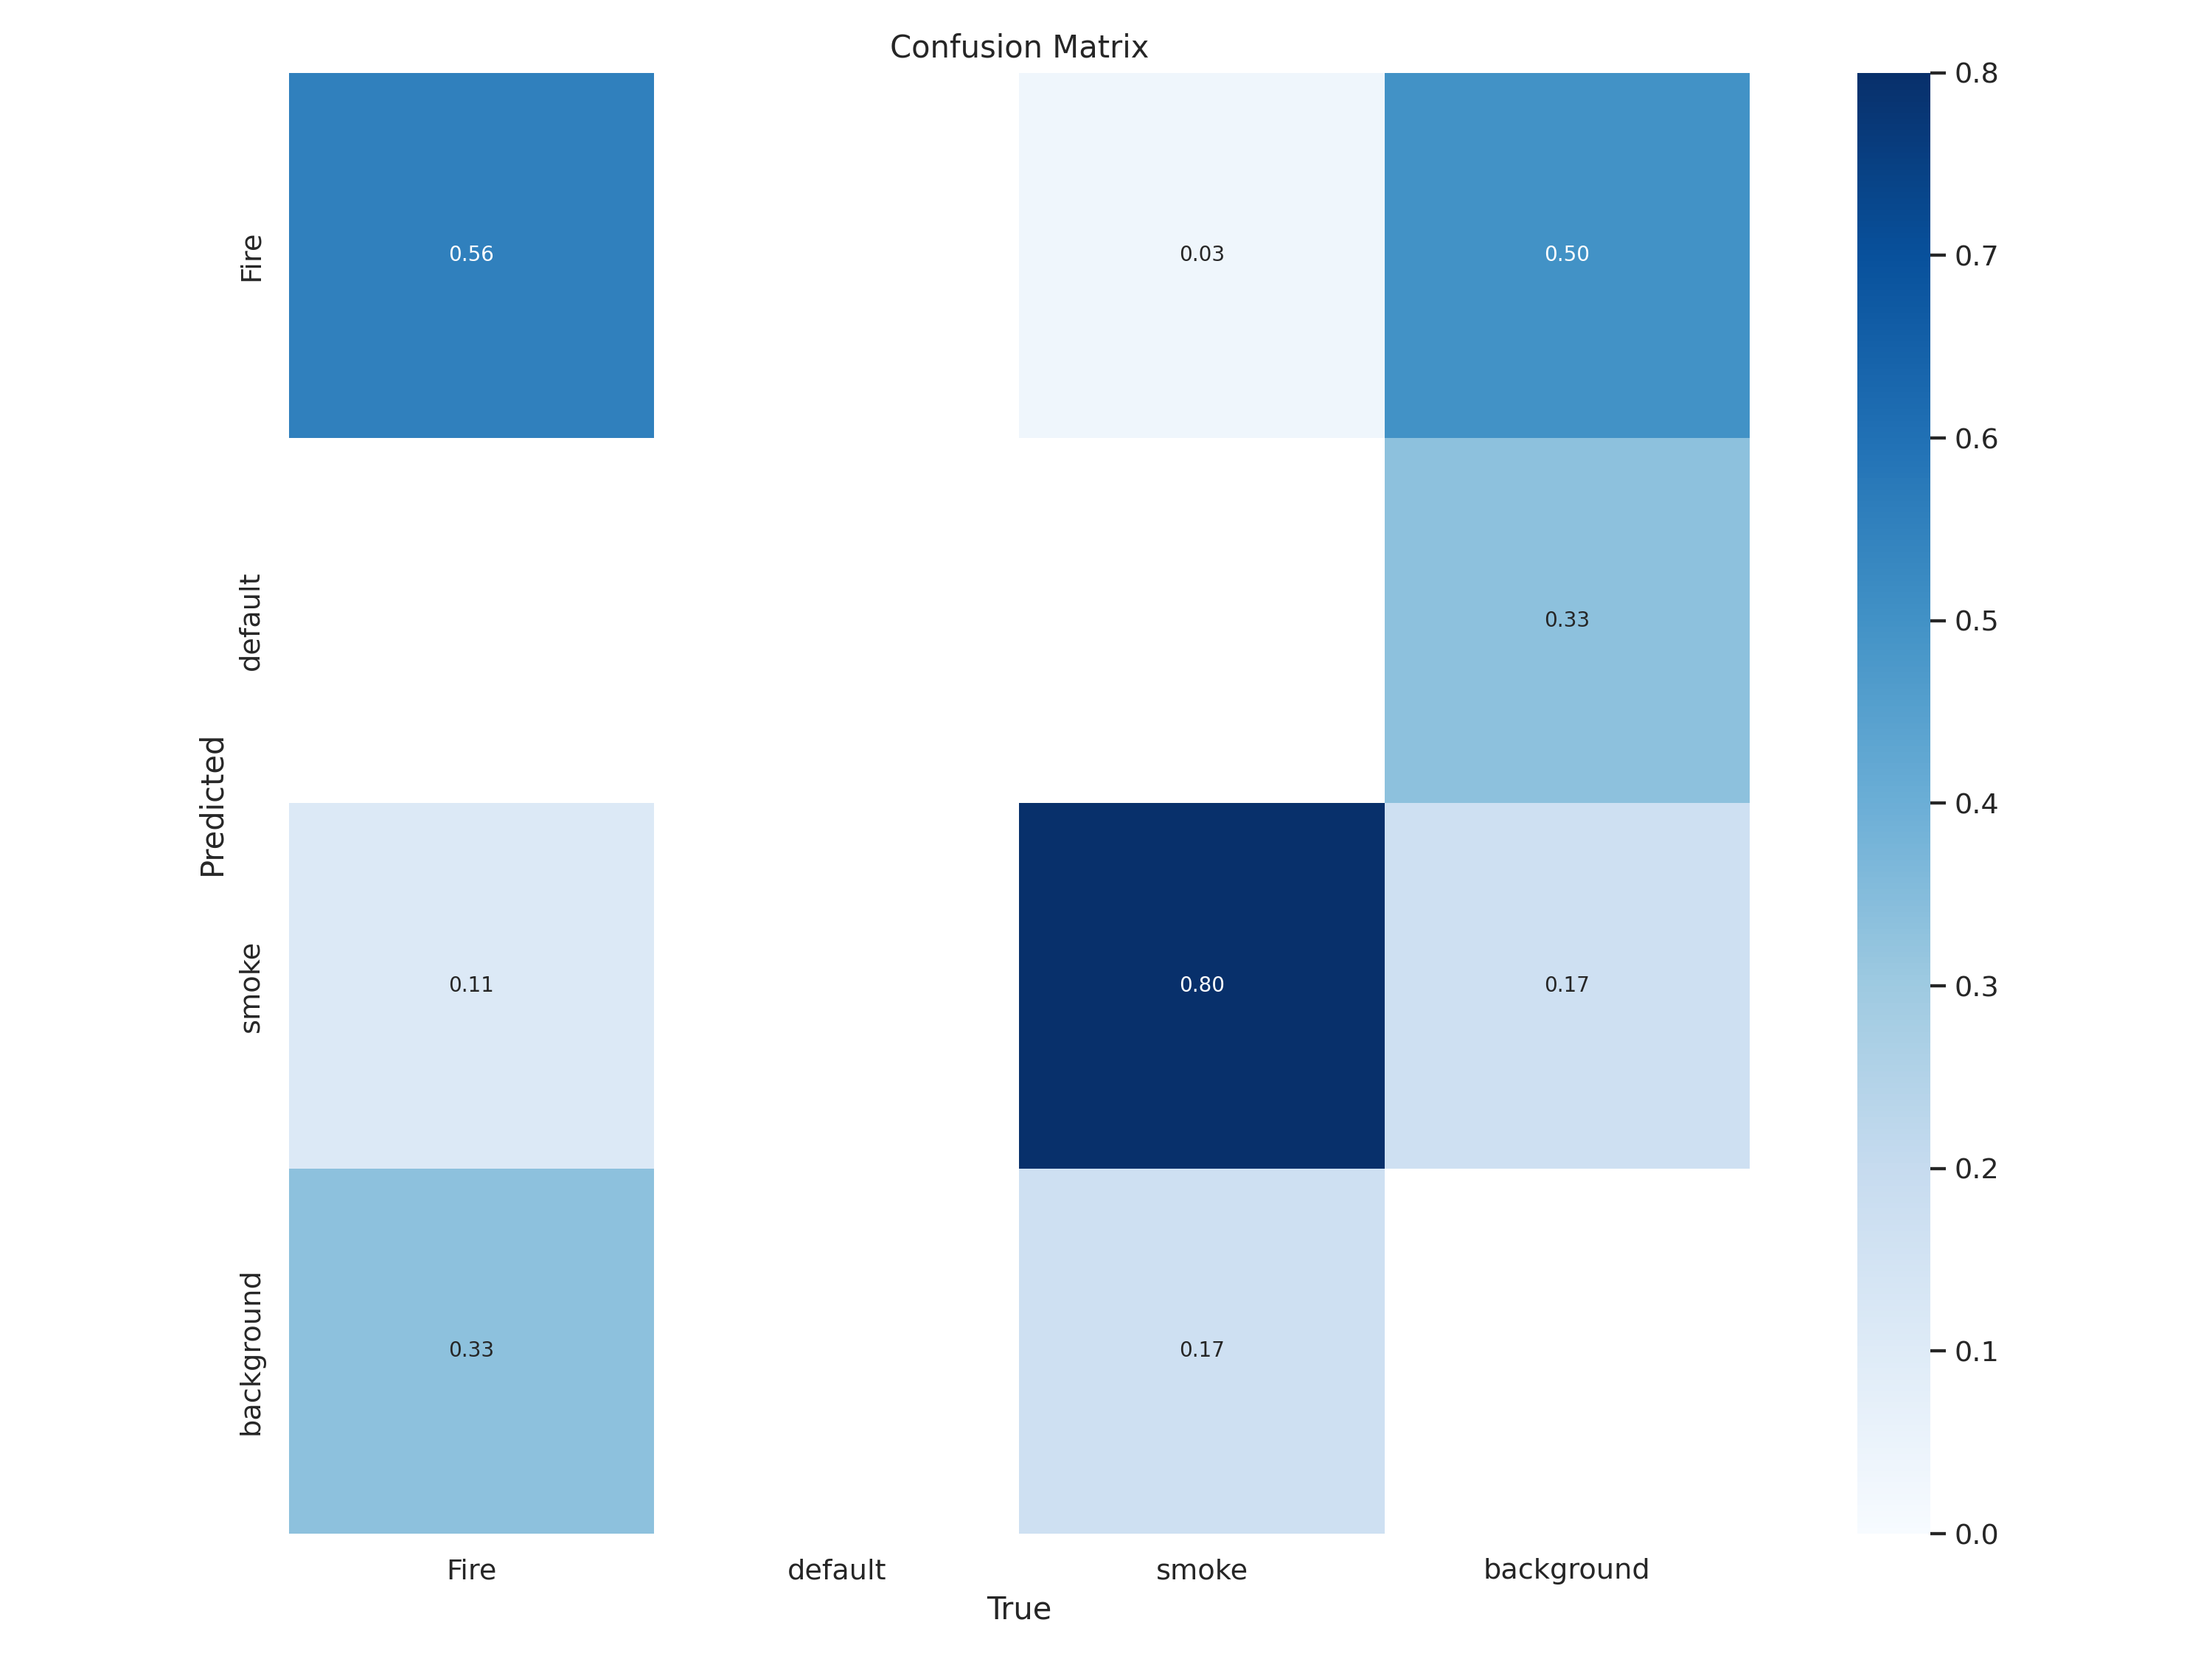

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

## MODEL PERFORMANCE

/content/drive/MyDrive/datasets/fire


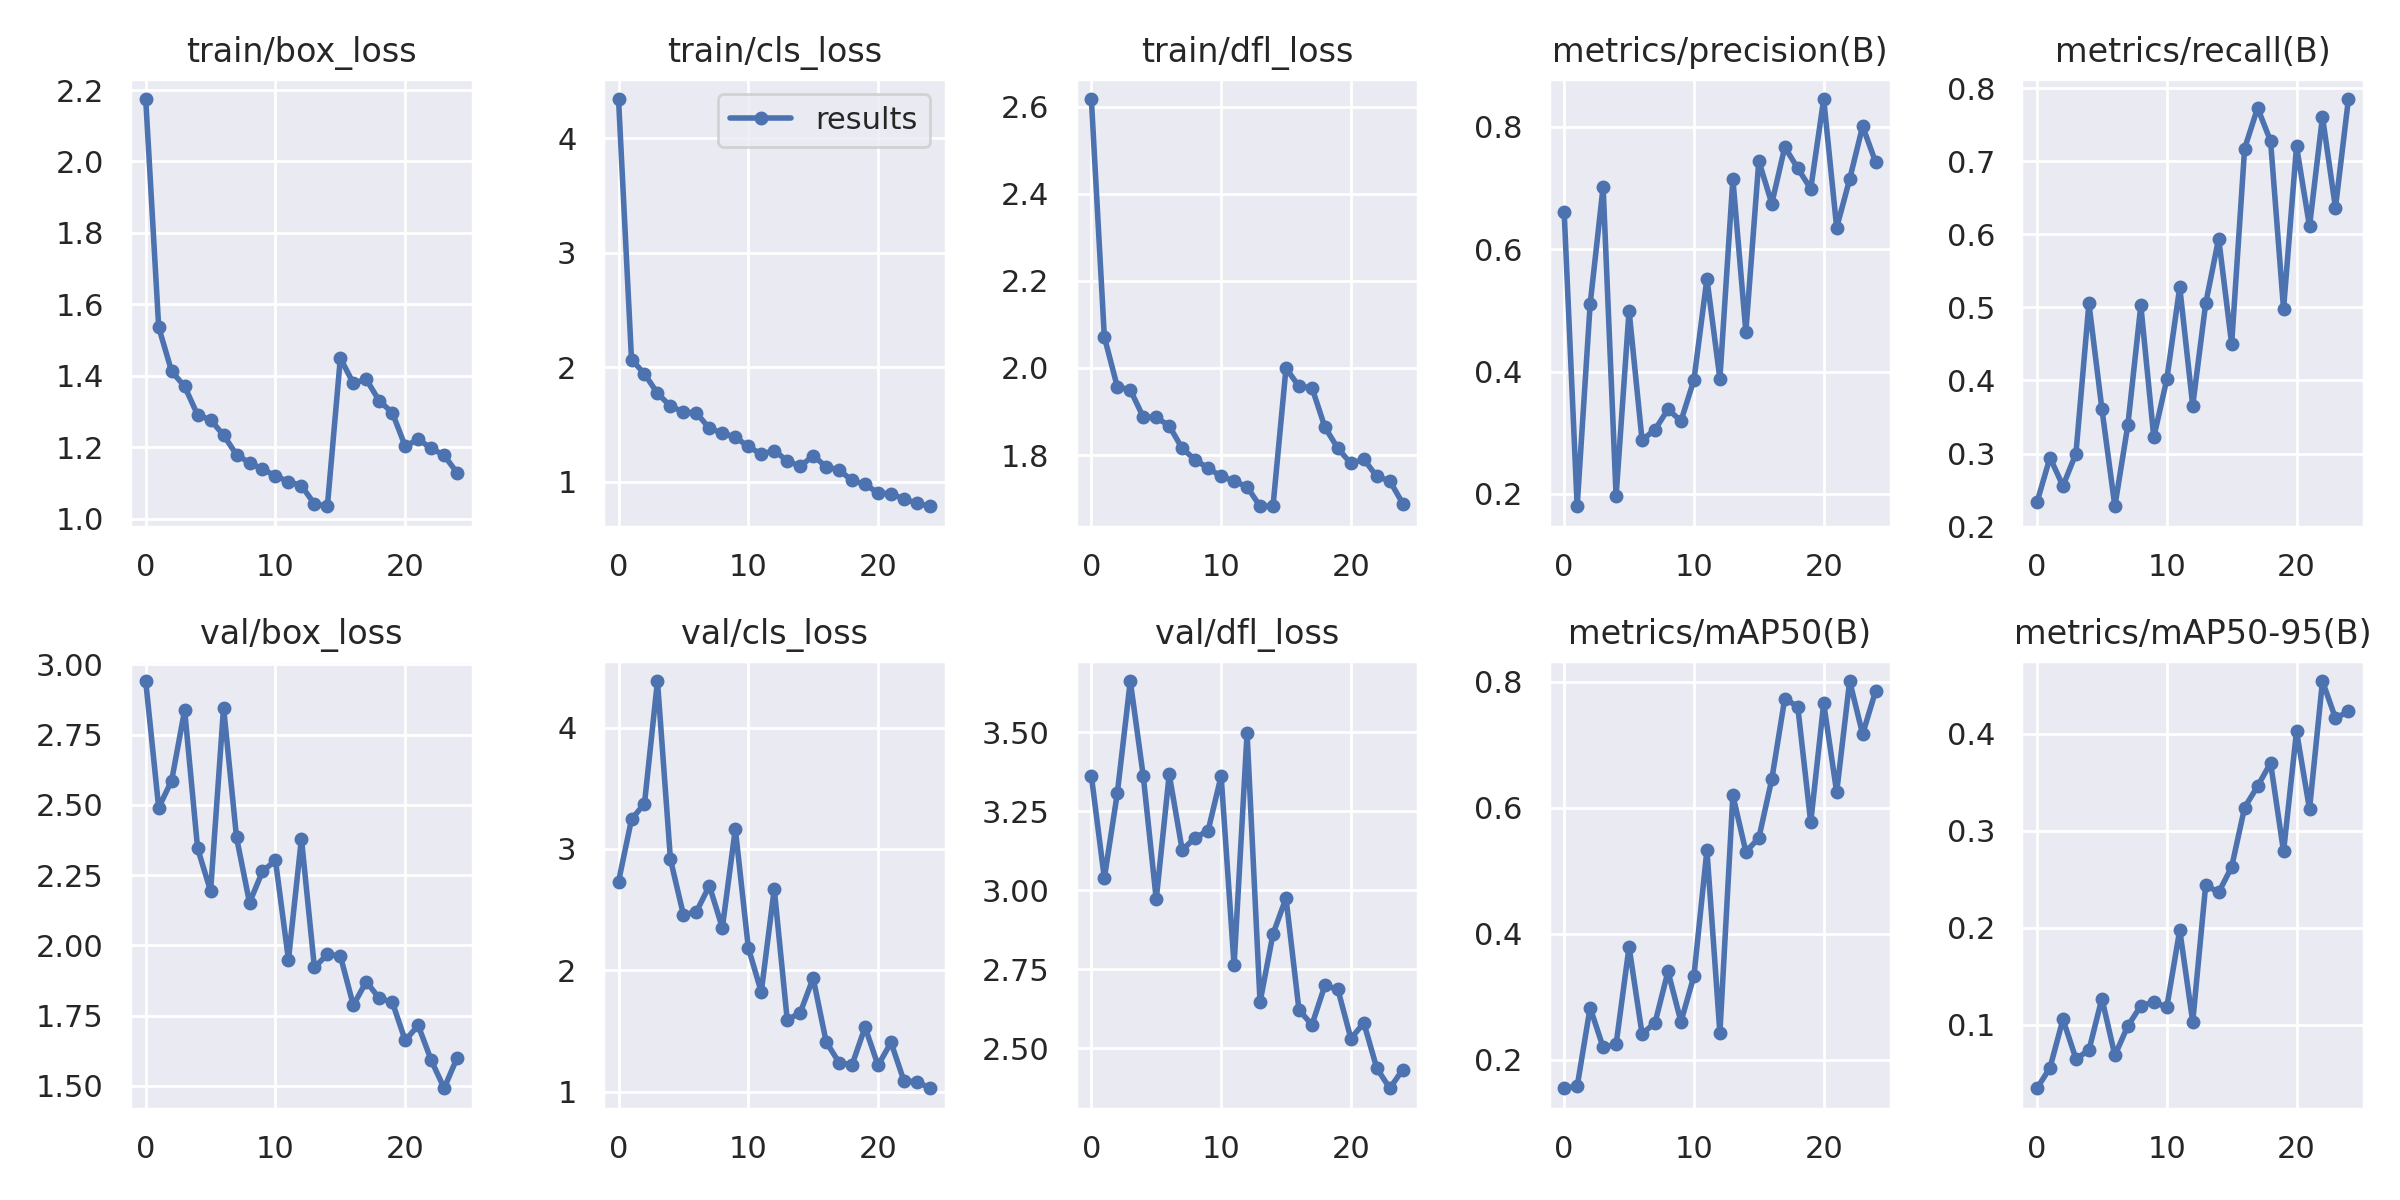

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content/drive/MyDrive/datasets/fire


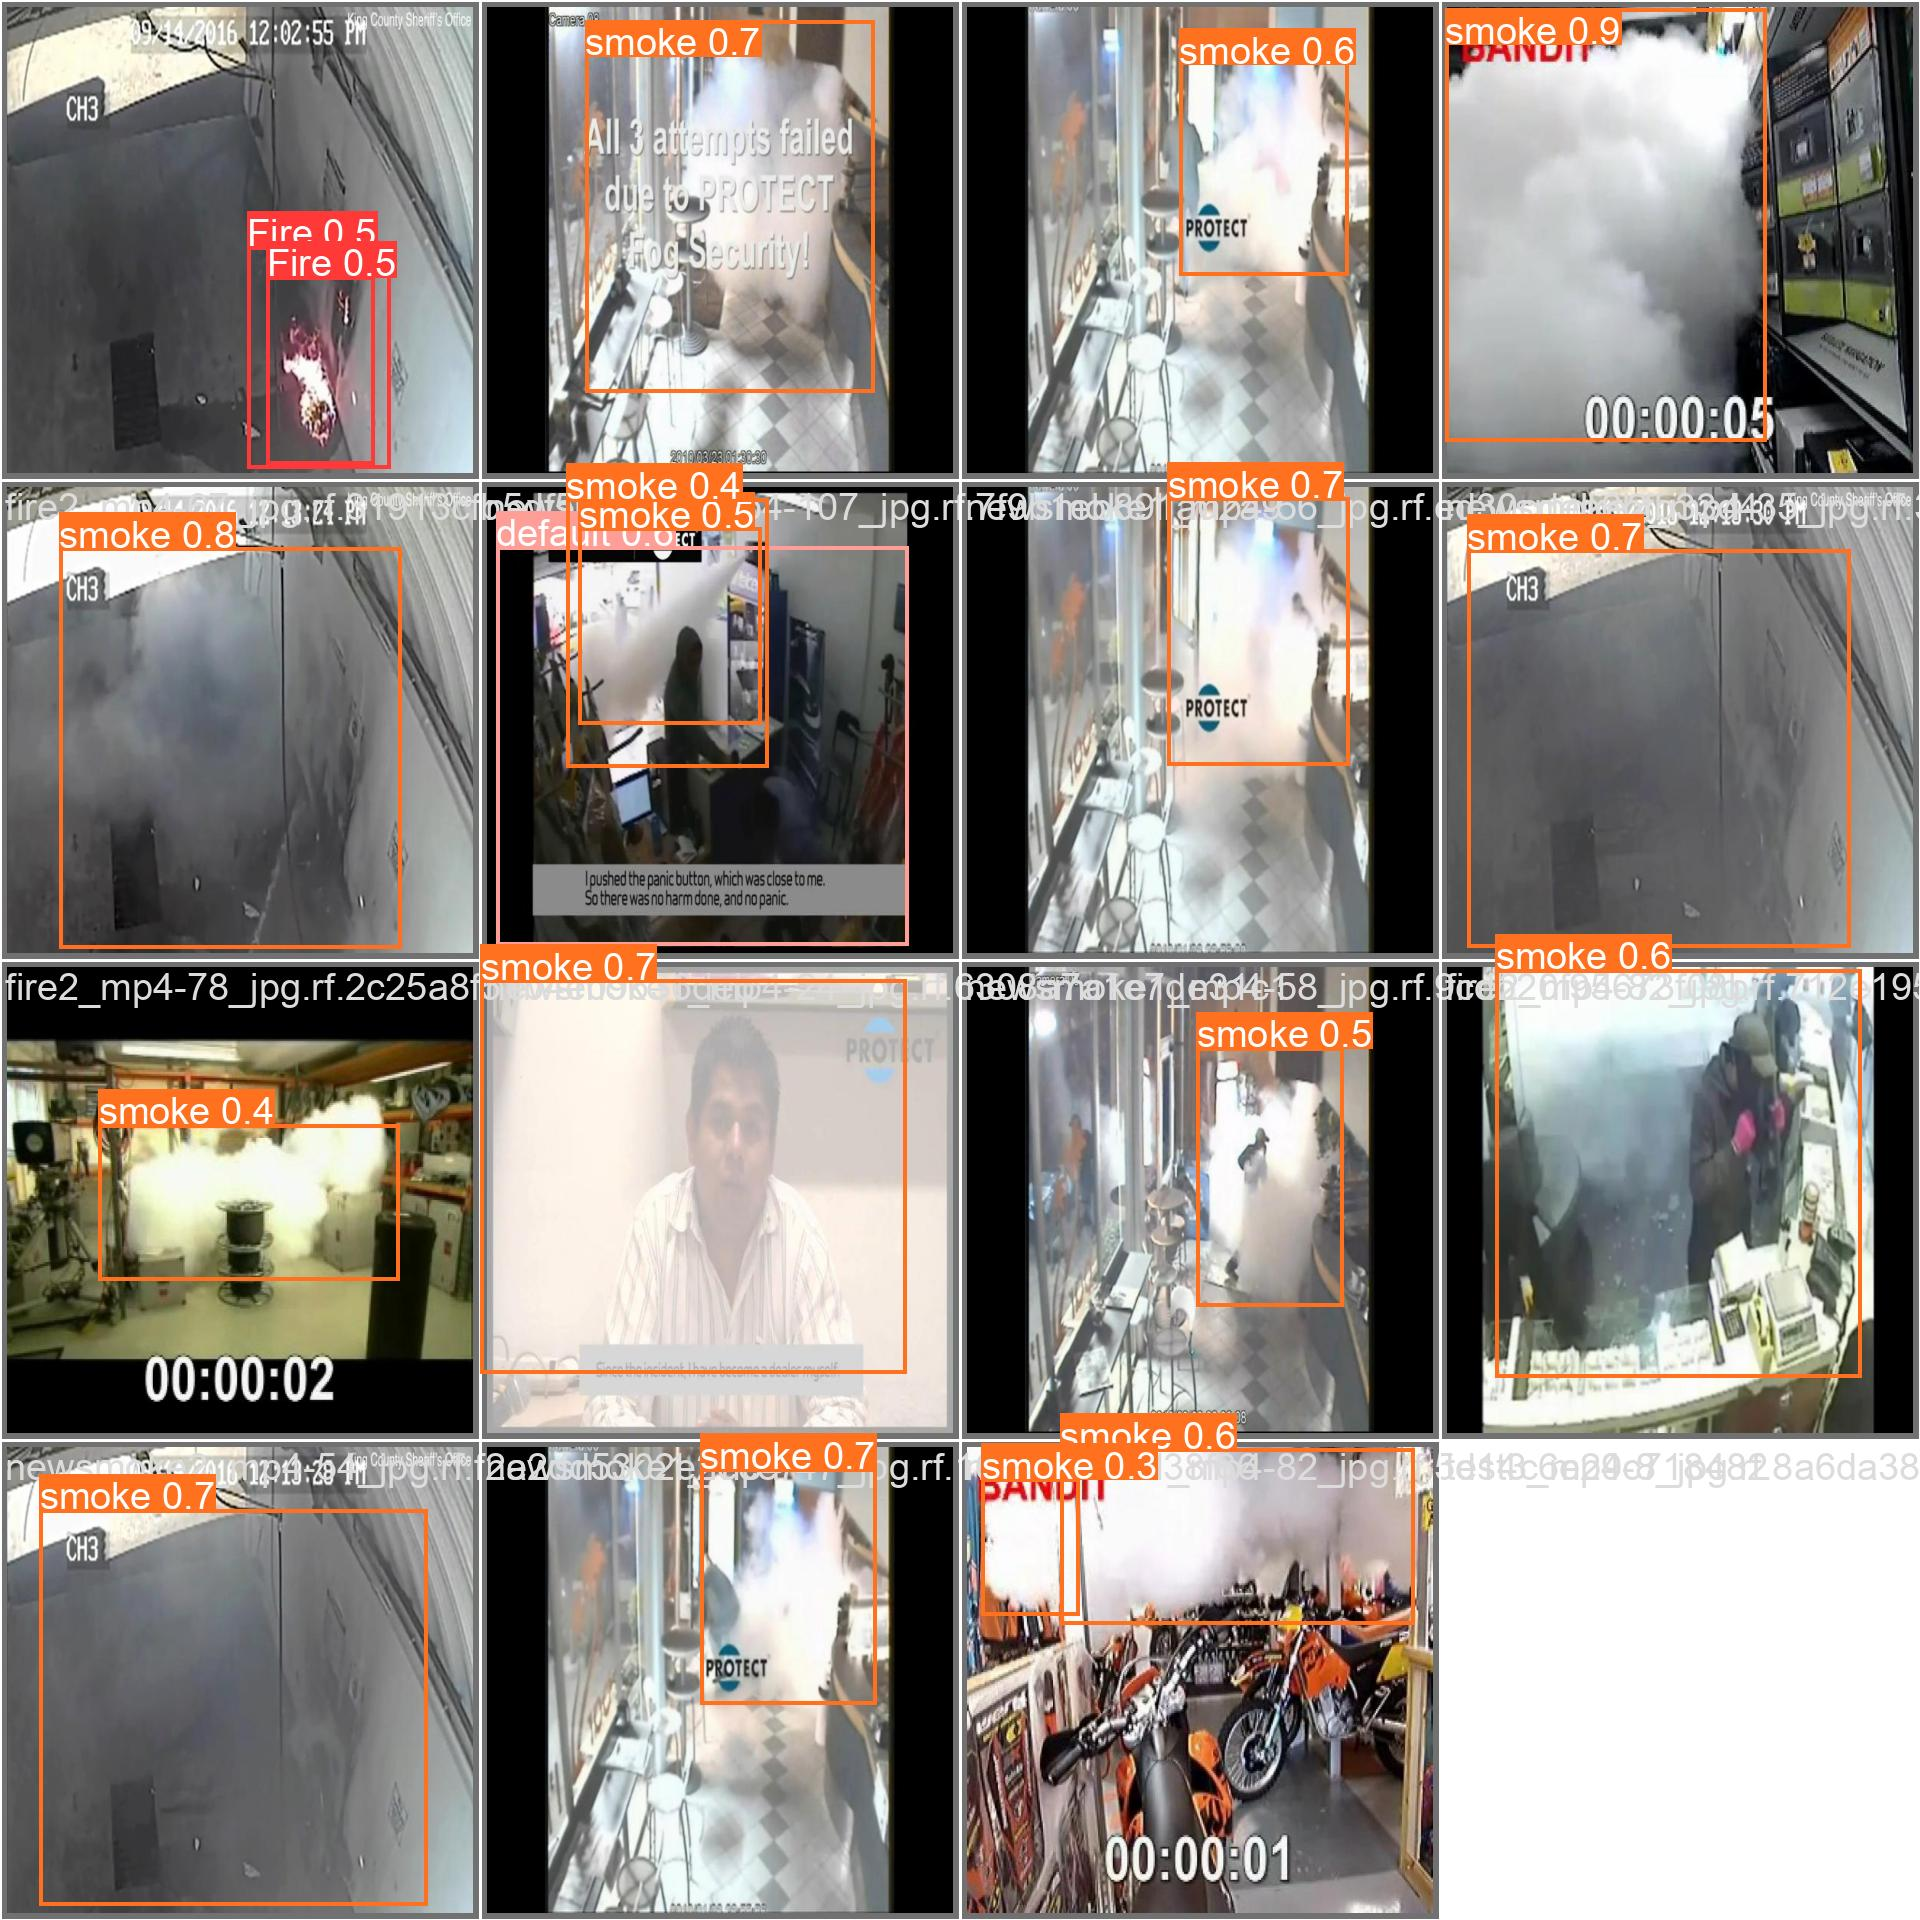

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch1_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=data.yaml

/content/drive/MyDrive/datasets/fire
2023-10-15 04:28:26.199570: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/datasets/fire/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.20s/it]
                   all         47         48      0.714      0.761      0.801      0.454
                  Fire         47         18      0.712      0.722       0.75       0.36
                 smoke         47         30      0.717        0.8      0.852      0.549
Speed: 11.2ms pre-process, 23.5ms inference, 0.0ms loss, 4.1ms post-process per image


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source="/content/drive/MyDrive/datasets/fire/test/images" save=True

/content/drive/MyDrive/datasets/fire
2023-10-15 04:28:54.565192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/55 /content/drive/MyDrive/datasets/fire/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 1024x1024 2 Fires, 32.5ms
image 2/55 /content/drive/MyDrive/datasets/fire/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 1024x1024 1 Fire, 32.6ms
image 3/55 /content/drive/MyDrive/datasets/fire/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 1024x1024 1 Fire, 32.5ms
image 4/55 /content/drive/MyDrive/datasets/fire/test/images/fire2_mp4-50_jpg.rf.07b08a19a25759f464ebccd1158f1d23.jpg: 1024x1024 1 Fire, 32.5ms
image 5/55 /content/drive/MyDrive/datasets/fire/test/images/fire2_mp4-51_jpg.rf.09ddf16d6c4c8117c7

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source="/content/drive/MyDrive/datasets/fire/videos/input6.mp4" save=True

/content/drive/MyDrive/datasets/fire
2023-10-17 08:38:03.167573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 08:38:04.060685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/4029) /content/drive/MyDrive/datasets/fire/videos/input6.mp4: 576x1024 1 Fire, 83.8ms
video 1/1 (2/4029) /content/drive/MyDrive/datasets/fire/videos/input6.mp4: 576x1024 1 Fire, 20.1ms
video 1/1 (3/4029) /content/drive/MyDrive/datasets/fire/videos/input6.mp4: 576x1024 1 Fire, 20.0ms
video 1/1 (4/4029) /content/drive/MyDrive/datasets/fir

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/datasets/fire/videos/input3.mp4 save=True

/content/drive/MyDrive/datasets/fire
2023-10-15 04:38:01.329117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 69.0ms
video 1/1 (2/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 20.1ms
video 1/1 (3/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 20.0ms
video 1/1 (4/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 20.0ms
video 1/1 (5/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 20.1ms
video 1/1 (6/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 18.8ms
video 1/1 (7/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 18.5ms
video 1/1 (8/4029) /content/drive/MyDrive/input6.mp4: 576x1024 1 Fire, 18.5ms
video 1/1 (9/4029) /content/drive/MyDrive/input

TRAINING ON VIDEO

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/datasets/fire/videos/greece.mp4 save=True

/content/drive/MyDrive/datasets/fire
2023-10-18 11:17:22.426119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 11:17:23.330003: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1522) /content/drive/MyDrive/datasets/fire/videos/greece.mp4: 576x1024 106.4ms
video 1/1 (2/1522) /content/drive/MyDrive/datasets/fire/videos/greece.mp4: 576x1024 20.1ms
video 1/1 (3/1522) /content/drive/MyDrive/datasets/fire/videos/greece.mp4: 576x1024 20.0ms
video 1/1 (4/1522) /content/drive/MyDrive/datasets/fire/videos/greece.mp4: 576x1024 2

### VIDEOS


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from IPython.display import Video
# Path to the processed video with detections
processed_video_path = '/content/drive/MyDrive/runs/detect/predict17/greece.mp4'

# Path to the directory containing detection result images
detection_images_dir = '/content/drive/MyDrive/runs/detect/predict17'

# Open the processed video
cap = cv2.VideoCapture(processed_video_path)

# Get the video's frame dimensions and frames per second (fps)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create a VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = '/content/drive/MyDrive/runs/detect/predict17/output_video.mp4'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Iterate through the frames of the input video and overlay detections
for frame_id in tqdm(range(4029)):  # Assuming there are 4029 frames
    # Read the frame from the input video
    ret, frame = cap.read()
    if not ret:
        break

    # Load the corresponding detection result image
    detection_image_path = f'{detection_images_dir}/{frame_id:04d}.jpg'
    detection_image = cv2.imread(detection_image_path)

    # Overlay the detection image on top of the frame
    combined_frame = cv2.addWeighted(frame, 1, detection_image, 0.7, 0)

    # Write the combined frame to the output video
    out.write(combined_frame)

# Release video objects
cap.release()
out.release()

# Display the output video
from IPython.display import Video
Video(output_video_path, embed=True)


  0%|          | 0/4029 [00:00<?, ?it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/input5.mp4 save=True

/content/drive/MyDrive/datasets/fire
2023-10-15 05:02:03.706573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/2714) /content/drive/MyDrive/input5.mp4: 576x1024 1 smoke, 78.6ms
video 1/1 (2/2714) /content/drive/MyDrive/input5.mp4: 576x1024 1 smoke, 19.6ms
video 1/1 (3/2714) /content/drive/MyDrive/input5.mp4: 576x1024 1 smoke, 19.6ms
video 1/1 (4/2714) /content/drive/MyDrive/input5.mp4: 576x1024 1 smoke, 19.6ms
video 1/1 (5/2714) /content/drive/MyDrive/input5.mp4: 576x1024 1 smoke, 19.6ms
video 1/1 (6/2714) /content/drive/MyDrive/input5.mp4: 576x1024 19.6ms
video 1/1 (7/2714) /content/drive/MyDrive/input5.mp4: 576x1024 19.6ms
video 1/1 (8/2714) /content/drive/MyDrive/input5.mp4: 576x1024 19.6ms
video 1/1 (9/2714) /content/drive/MyDrive/input5.mp4: 576x1024 19.

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
from IPython.display import Video
# Path to the processed video with detections
processed_video_path = '/content/drive/MyDrive/runs/detect/predict7/input5.mp4'

# Path to the directory containing detection result images
detection_images_dir = '/content/drive/MyDrive/runs/detect/predict7'

# Open the processed video
cap = cv2.VideoCapture(processed_video_path)

# Get the video's frame dimensions and frames per second (fps)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create a VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = '/content/drive/MyDrive/runs/detect/predict7/output_video.mp4'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Iterate through the frames of the input video and overlay detections
for frame_id in tqdm(range(4029)):  # Assuming there are 4029 frames
    # Read the frame from the input video
    ret, frame = cap.read()
    if not ret:
        break

    # Load the corresponding detection result image
    detection_image_path = f'{detection_images_dir}/{frame_id:04d}.jpg'
    detection_image = cv2.imread(detection_image_path)

    # Overlay the detection image on top of the frame
    combined_frame = cv2.addWeighted(frame, 1, detection_image, 0.7, 0)

    # Write the combined frame to the output video
    out.write(combined_frame)

# Release video objects
cap.release()
out.release()

# Display the output video
from IPython.display import Video
Video(output_video_path, embed=True)


  0%|          | 0/4029 [00:00<?, ?it/s]


In [ ]:
from IPython.display import HTML

# Path to the processed video with detections
processed_video_path = '/content/drive/MyDrive/runs/detect/predict8/output_video.mp4'

# Create an HTML video element to display the video
video_html = f'''
<video width="640" height="360" controls>
  <source src="{processed_video_path}" type="video/mp4">
  Your browser does not support the video tag.
</video>
'''

# Display the video element
HTML(video_html)


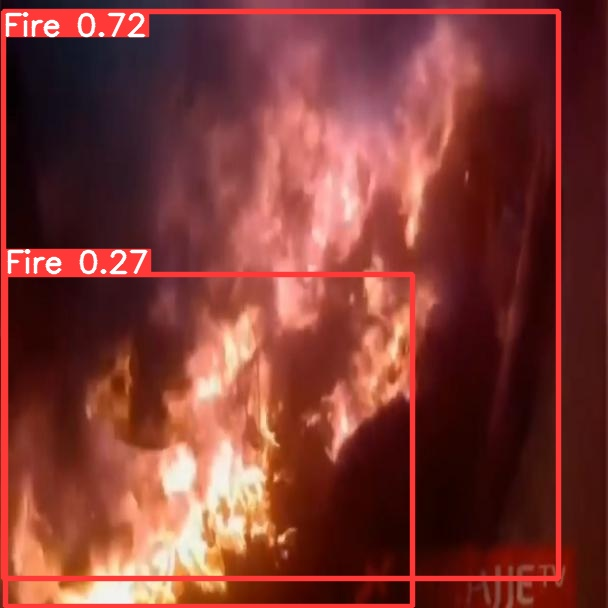

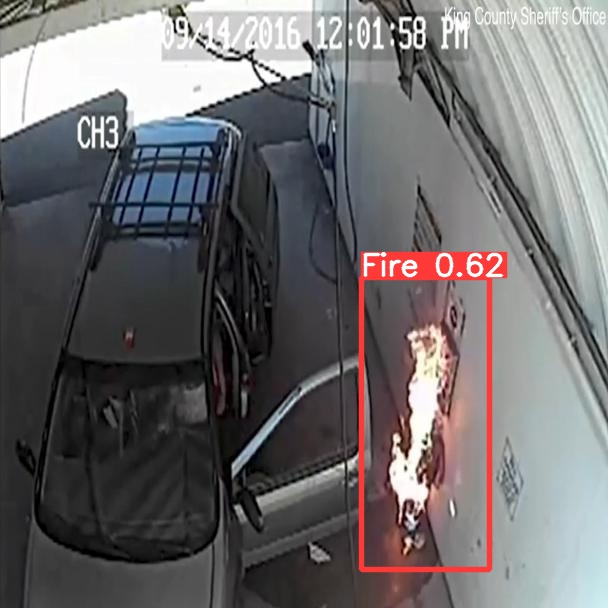

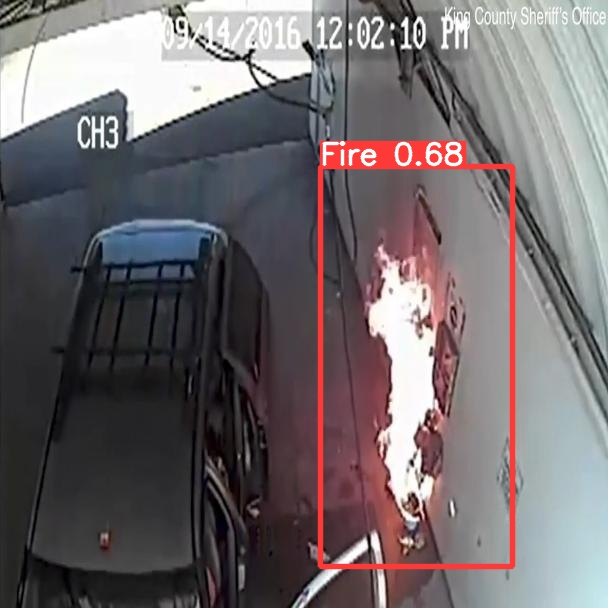

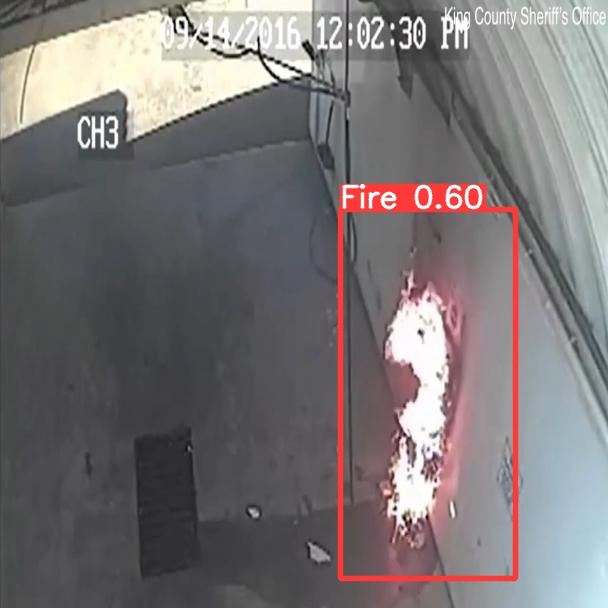

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:4]:
  display(Image(filename=image_path, width=600))
  print("\n")

